<a href="https://colab.research.google.com/github/KalyanMohanty/Fruit_Classification/blob/main/model_descriptions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# from google.colab import drive
# drive.mount('/content/drive')

In [42]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models,layers

In [43]:
names = os.listdir("/content/drive/MyDrive/fruit dataset/")

In [44]:
images = []
x = []
y = []
for folder in names:
  files = os.listdir("/content/drive/MyDrive/fruit dataset/"+folder)
  for file in files:
    img = image.load_img("/content/drive/MyDrive/fruit dataset/"+folder+"/"+file,target_size=(200,200))
    images.append(img)
    img = image.img_to_array(img)
    x.append(img)
    y.append(names.index(folder))

x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)
y = to_categorical(y)
print(y.shape)
x = x/255

(850, 200, 200, 3)
(850,)
(850, 6)


In [45]:
from tensorflow.keras.applications import resnet50
model2 = resnet50.ResNet50(weights='imagenet')
#new_model.summary()
input_layer = layers.Input(shape=(200,200,3))
model2 = resnet50.ResNet50(weights='imagenet',include_top=False,input_tensor=input_layer)
#model2.summary()
last_layer = model2.output
flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)
resnet50_model = models.Model(inputs=input_layer,outputs=output_layer)
#new_model.summary()
for layer in resnet50_model.layers[:-1]:
 layer.trainable=False
#new_model.summary()
from sklearn.model_selection import train_test_split
x_Train,x_Test,y_Train,y_Test = train_test_split(x,y,test_size=0.2,random_state=5)
resnet50_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# reshis = resnet50_model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_Test,y_Test))

In [46]:
print(resnet50_model.summary())

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 206, 206, 3)  0           ['input_16[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 100, 100, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

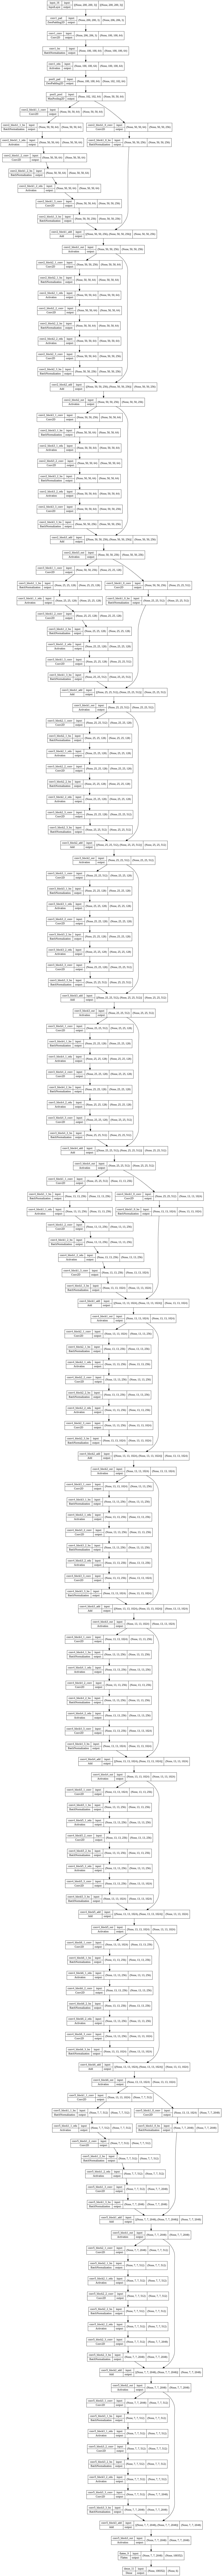

In [47]:
plot_model(resnet50_model,to_file='/content/drive/MyDrive/resnet50.png',  show_shapes=True, show_layer_names=True)

#VGG 16

In [48]:
from keras.applications.vgg16 import VGG16
model3 = VGG16(weights='imagenet')
# print(model3.summary())
from keras.utils.vis_utils import plot_model
#plot_model(model3, to_file='vgg.png')
input_layer = layers.Input(shape=(200,200,3))
model3 = VGG16(weights='imagenet',include_top=False,input_tensor=input_layer)
# print(model3.summary())
last_layer = model3.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

vgg16_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in vgg16_model.layers[:-1]:
  layer.trainable=False
# new_model.summary()
# from sklearn.model_selection import train_test_split
# xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=5)
vgg16_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
print(vgg16_model.summary())

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0   

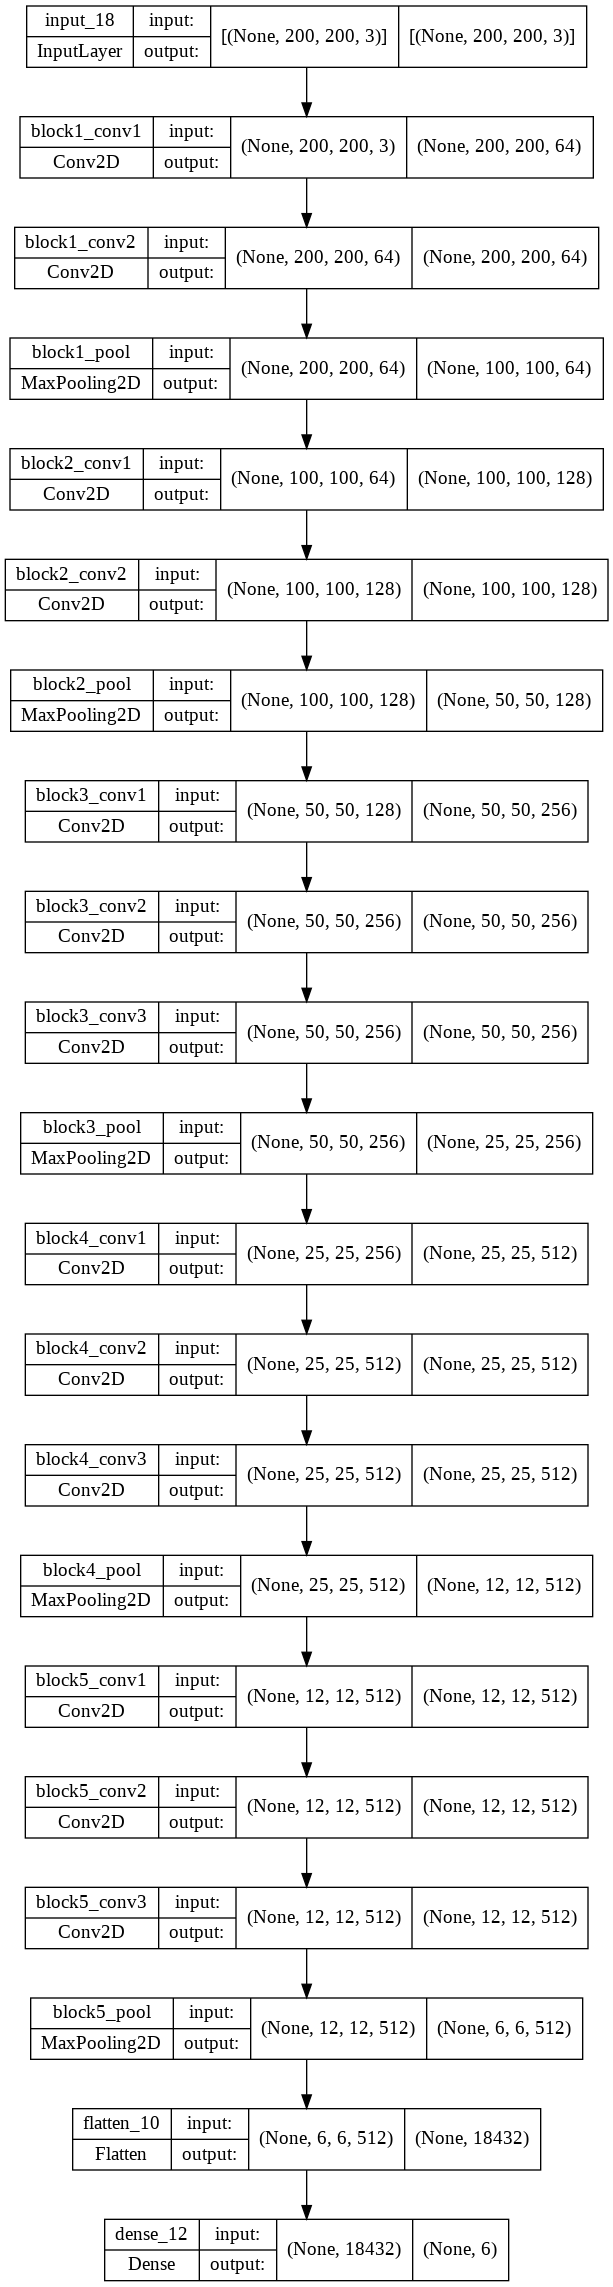

In [50]:
plot_model(vgg16_model,to_file='/content/drive/MyDrive/vgg16.png',  show_shapes=True, show_layer_names=True)

# VGG 19

In [51]:
from keras.applications.vgg19 import VGG19
model4 = VGG19(weights='imagenet')
#print(model3.summary())
input_layer = layers.Input(shape=(200,200,3))
model4 = VGG19(weights='imagenet',include_top=False,input_tensor=input_layer)
#print(model3.summary())
last_layer = model4.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

vgg19_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in vgg19_model.layers[:-1]:
  layer.trainable=False
vgg19_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
print(vgg19_model.summary())

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0  

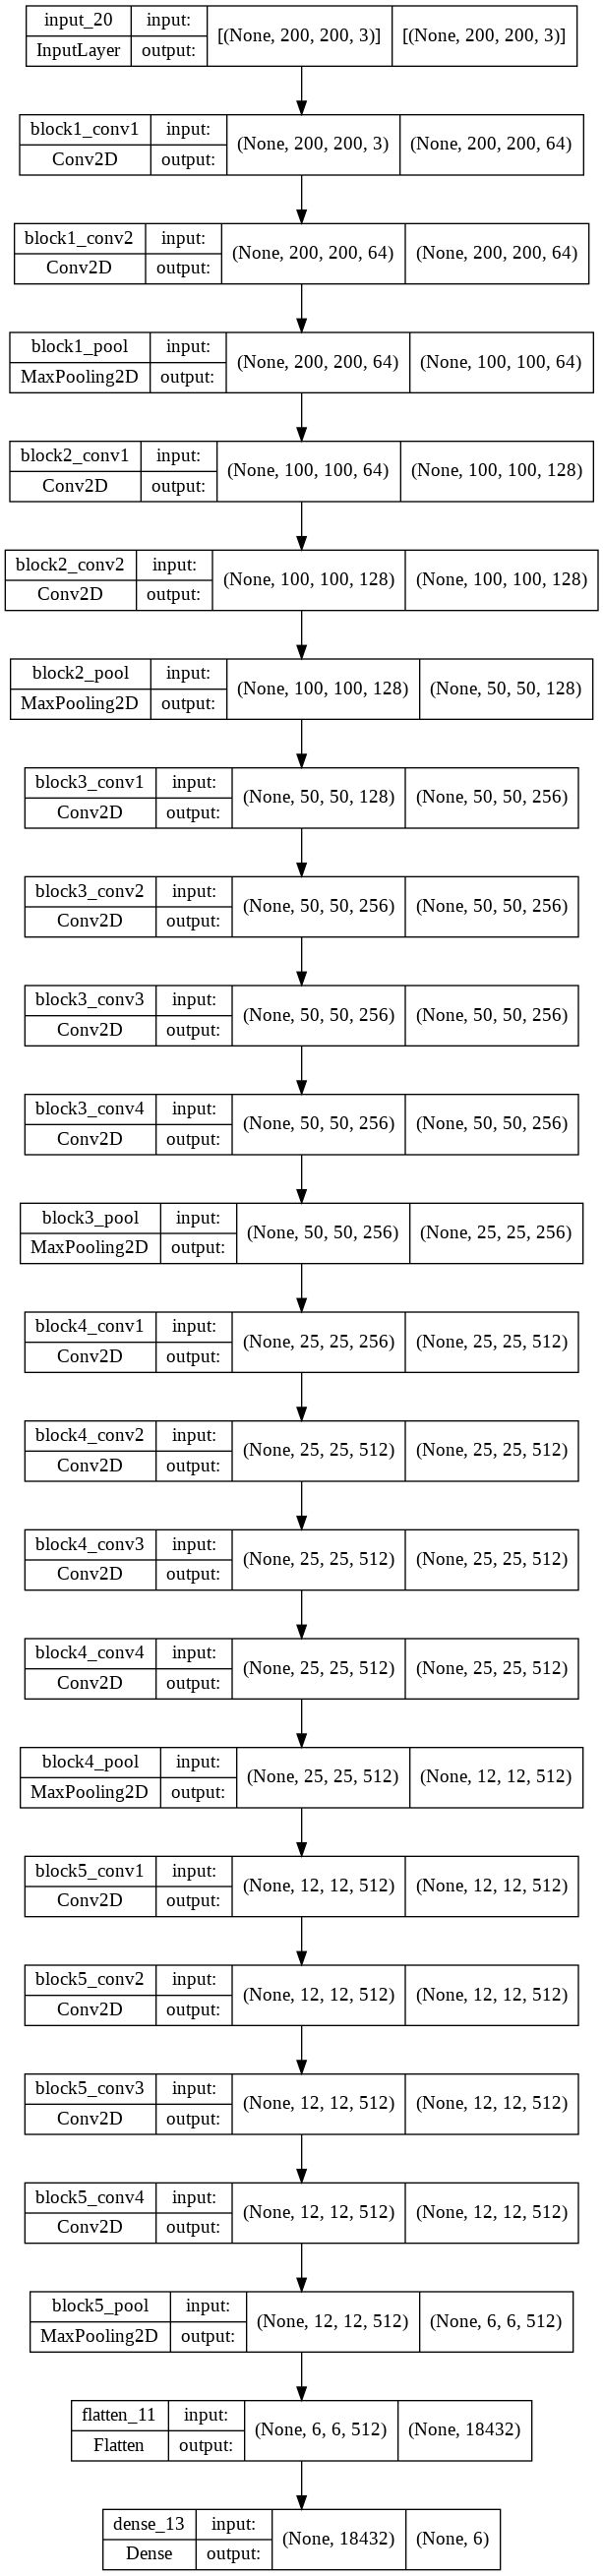

In [53]:
plot_model(vgg19_model,to_file='/content/drive/MyDrive/vgg19_model.png',  show_shapes=True, show_layer_names=True)

# Inception

In [54]:
import tensorflow as tf
input_layer = layers.Input(shape=(200,200,3))
model5 = tf.keras.applications.InceptionResNetV2(weights='imagenet',
    include_top=False,input_tensor=input_layer)
#model5.summary()
last_layer = model5.output

flat = layers.Flatten()(last_layer)
output_layer = layers.Dense(6,activation='softmax')(flat)

v2_new_model = models.Model(inputs=input_layer,outputs=output_layer)
for layer in v2_new_model.layers[:-1]:
  layer.trainable=False
v2_new_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# v2_model.fit(XTrain,YTrain,batch_size=32,epochs=20,validation_data=(XTest,YTest))

In [55]:
print(v2_new_model.summary())


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_21 (InputLayer)          [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_816 (Conv2D)            (None, 99, 99, 32)   864         ['input_21[0][0]']               
                                                                                                  
 batch_normalization_812 (Batch  (None, 99, 99, 32)  96          ['conv2d_816[0][0]']             
 Normalization)                                                                                   
                                                                                           

In [56]:
plot_model(v2_new_model,to_file='/content/drive/MyDrive/inception_resnet50_v2.png',  show_shapes=True, show_layer_names=True)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.517941 to fit
tcmalloc: large alloc 1224400896 bytes == 0x55d4bc016000 @  0x7f73dea16001 0x7f73dacad1fa 0x7f73dacad2ad 0x7f73dbe386df 0x7f73dc32f261 0x7f73de7ac468 0x7f73de7aed53 0x55d4b8bdc092 0x7f73de161c87 0x55d4b8bdc12a



# CNN

In [57]:
model = models.Sequential()

model.add(layers.Conv2D(filters=20,kernel_size=(5,5),input_shape=(200,200,3),activation = 'relu'))
model.add(layers.Conv2D(30,(5,5),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(40,(3,3),activation='relu'))
model.add(layers.Conv2D(60,(3,3),activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(180,activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(6,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

In [58]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1019 (Conv2D)        (None, 196, 196, 20)      1520      
                                                                 
 conv2d_1020 (Conv2D)        (None, 192, 192, 30)      15030     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 96, 96, 30)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 96, 96, 30)        0         
                                                                 
 conv2d_1021 (Conv2D)        (None, 94, 94, 40)        10840     
                                                                 
 conv2d_1022 (Conv2D)        (None, 92, 92, 60)        21660     
                                                      

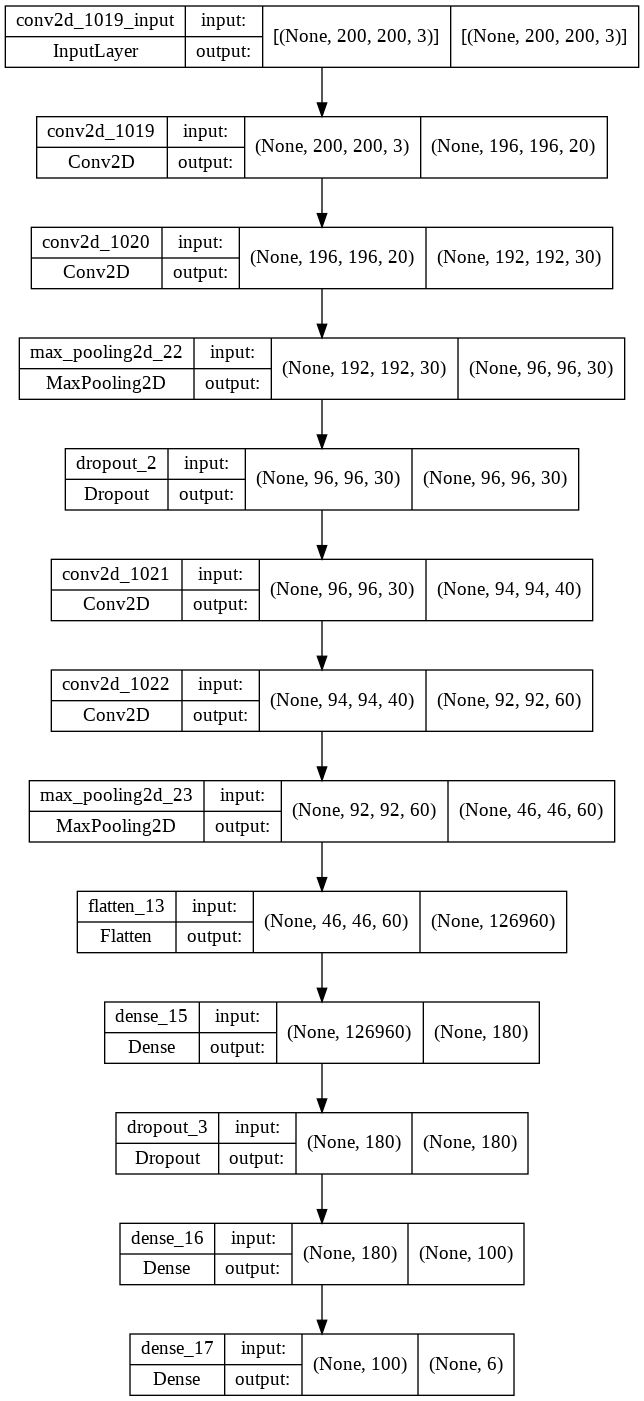

In [59]:
plot_model(model,to_file='/content/drive/MyDrive/cnn.png',  show_shapes=True, show_layer_names=True)